In [9]:
import numpy as np
import matplotlib.pyplot as plot
import random
import time
import h5py
from scipy.signal import find_peaks


In [10]:
filename = "/sdf/data/lcls/ds/xcs/xcsx48919/hdf5/smalldata/xcsx48919_Run0146.h5"

exp = 'xcsx48919'
run = 146

f = h5py.File(filename,'r')


def print_name(name, obj):
    if isinstance(obj, h5py.Dataset):
        print('Dataset:', name)
    elif isinstance(obj, h5py.Group):
        print('Group:', name)

with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    h5f.visititems(print_name) # print all structure names

Group: Sums
Dataset: Sums/acq01_calib
Dataset: Sums/acq01_calib_dropped
Dataset: Sums/acq01_calib_dropped_square
Group: UserDataCfg
Group: UserDataCfg/EOrbits
Dataset: UserDataCfg/EOrbits/detname
Dataset: UserDataCfg/EOrbits/name
Group: UserDataCfg/acq01
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_bound
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_name
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_writeArea
Dataset: UserDataCfg/acq01/applyMask
Dataset: UserDataCfg/acq01/dataAccessTime
Dataset: UserDataCfg/acq01/delayTime
Dataset: UserDataCfg/acq01/fullScale
Dataset: UserDataCfg/acq01/interval
Dataset: UserDataCfg/acq01/maskCentral
Dataset: UserDataCfg/acq01/nSamples
Dataset: UserDataCfg/acq01/offset
Dataset: UserDataCfg/acq01/run
Group: UserDataCfg/damage
Dataset: UserDataCfg/damage/detAlias
Dataset: UserDataCfg/damage/detNames
Dataset: UserDataCfg/damage/name
Group: UserDataCfg/diodeGon
Dataset: UserDataCfg/diodeGon/detname
Dataset: UserDataCfg/diodeGon/name
Dataset: UserDataCfg/diodeGon/savePos
Gro

ipm [267668.25  263369.75  274009.625 ... 280239.375 269691.5   311127.   ]
acq01_data [[[ 0.22929688  0.24882813  0.2390625  ...  0.2390625   0.24882813
    0.        ]
  [-0.11962891 -0.13916016 -0.13427734 ... -0.16357422 -0.14892578
    0.        ]
  [ 0.04492188  0.03710938  0.04882812 ...  0.0390625   0.04345703
    0.        ]
  [-0.13964844 -0.14355469 -0.14160156 ... -0.13574219 -0.14160156
    0.        ]]

 [[ 0.25493164  0.25859375  0.24394531 ...  0.22441406  0.26835938
    0.        ]
  [-0.13916016 -0.16235352 -0.14892578 ... -0.12329102 -0.16845703
    0.        ]
  [ 0.04101562  0.0390625   0.04101562 ...  0.04345703  0.04345703
    0.        ]
  [-0.14160156 -0.14160156 -0.14990234 ... -0.14794922 -0.13183594
    0.        ]]

 [[ 0.23417969  0.22929688  0.24394531 ...  0.21953125  0.22929688
    0.        ]
  [-0.14404297 -0.11962891 -0.13916016 ... -0.13916016 -0.13427734
    0.        ]
  [ 0.04345703  0.04345703  0.046875   ...  0.04345703  0.05615234
    0.      

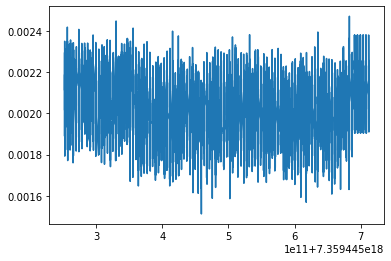

In [11]:
with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    sums_acq01 = h5f['Sums/acq01_calib'][()]
    acq01_data = h5f['acq01/ROI_0_area'][()]
    acq01_mean = h5f['acq01/ROI_0_mean'][()]
    time = h5f['event_time'][()]
    ipm5 = h5f['UserDataCfg/damage/detNames'][()]
    ipm = h5f['ipm4/sum'][()]

#print("time", time[1:10000]) #10:110])
#print("acq01_data", acq01_data[1:1000]) #[10:110])
print("ipm", ipm)

acq_len = len(acq01_data)
print("acq01_data",acq01_data)
print("shape", acq01_data.shape) #first dimension is number of events, second dim is channel number, 3rd dim is waveform. At each event there is a trigger that then takes 4000 waveform lines
print("ipm len", len(ipm))
fig, ax1 = plot.subplots()
ax1.plot(time[1:],acq01_mean[1:]) 
#ax1.plot(time[1:],ipm[1:])

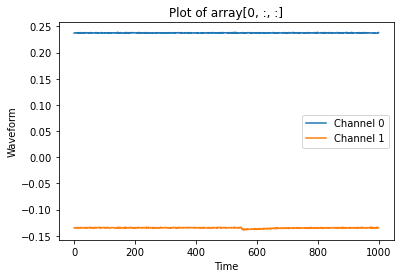

In [4]:
"""
import matplotlib.pyplot as plt
#rolling average over n (100ish) events 
#identify the peaks and onset event
# Plot the data along the third dimension for all rows at a specific index in the first dimension


i = 0
j = 2000
k = 3500
#for i in range (0,1):
  # index along the first dimension
    #print("i", i)
    #for j in range(array.shape[1]):  # loop through the second dimension (4 rows)
waveforms_subset_0 = acq01_data[j:k, 0, :1000]
waveforms_subset_1 = acq01_data[j:k, 1, :1000]
average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
average_waveform_1 = np.mean(waveforms_subset_1, axis=0)
plt.plot(average_waveform_0, label=f'Channel {0}')
plt.plot(average_waveform_1, label=f'Channel {1}')
    
    #plt.plot(acq01_data[i, 2, :], label=f'Channel {2}')
    #plt.plot(acq01_data[i, 3, :], label=f'Channel {3}')

plt.title(f'Plot of array[{i}, :, :]')
plt.xlabel('Time')
plt.ylabel('Waveform')
plt.legend()
plt.show()
#i = i + 1
"""



Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [564]
Values of ch1 peaks: [0.15109863]
Index range of event numbers: 4900-5000


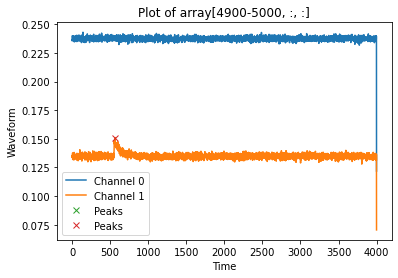

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [575]
Values of ch1 peaks: [0.15126953]
Index range of event numbers: 5400-5500


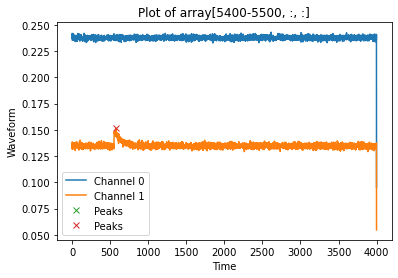

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.15112305]
Index range of event numbers: 6600-6700


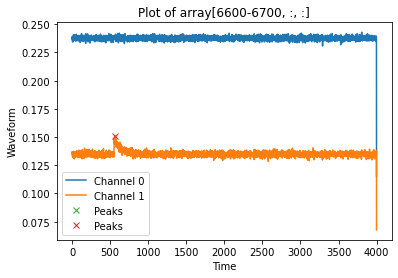

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [555]
Values of ch1 peaks: [0.15113525]
Index range of event numbers: 7000-7100


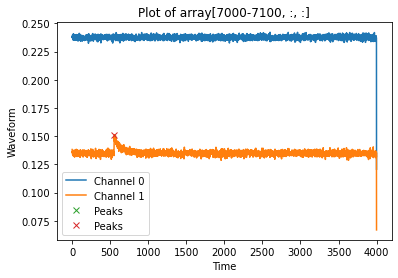

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [566]
Values of ch1 peaks: [0.15003662]
Index range of event numbers: 7100-7200


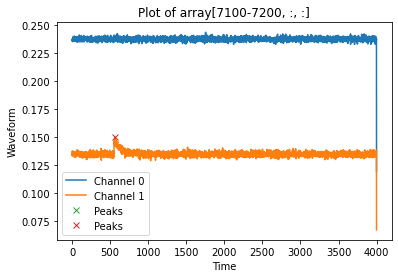

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [557]
Values of ch1 peaks: [0.15074463]
Index range of event numbers: 7300-7400


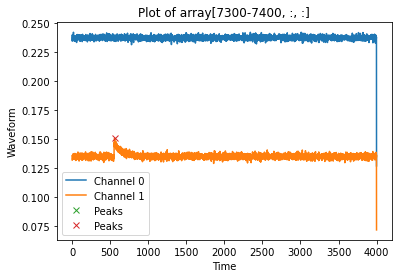

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [555]
Values of ch1 peaks: [0.15137939]
Index range of event numbers: 7800-7900


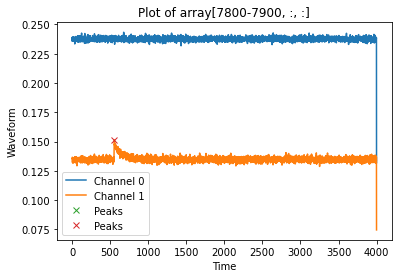

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [553]
Values of ch1 peaks: [0.15012207]
Index range of event numbers: 8500-8600


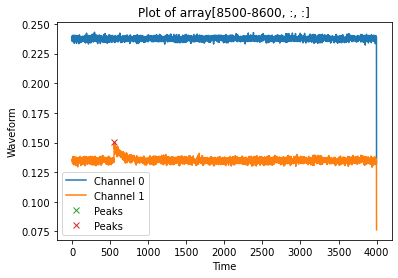

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [552]
Values of ch1 peaks: [0.15106201]
Index range of event numbers: 8700-8800


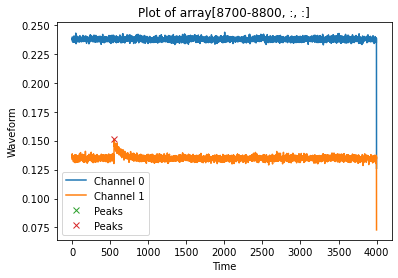

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [552]
Values of ch1 peaks: [0.15080566]
Index range of event numbers: 8800-8900


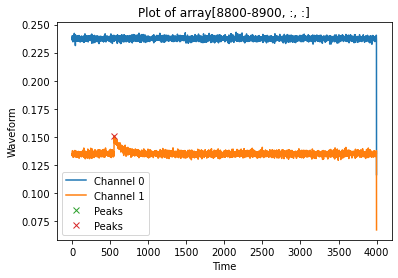

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [562]
Values of ch1 peaks: [0.15136719]
Index range of event numbers: 9000-9100


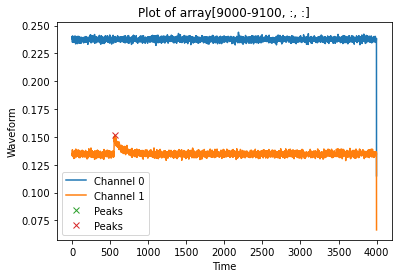

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [553]
Values of ch1 peaks: [0.15067139]
Index range of event numbers: 9400-9500


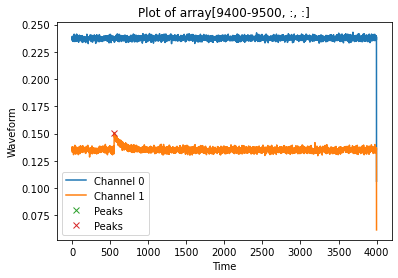

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [556]
Values of ch1 peaks: [0.15054932]
Index range of event numbers: 9700-9800


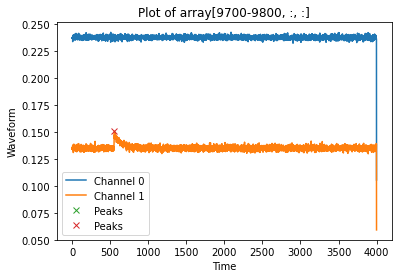

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [560]
Values of ch1 peaks: [0.15043945]
Index range of event numbers: 9800-9900


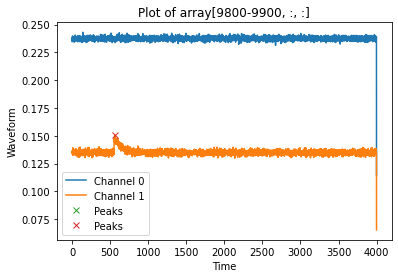

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [558]
Values of ch1 peaks: [0.15092773]
Index range of event numbers: 10300-10400


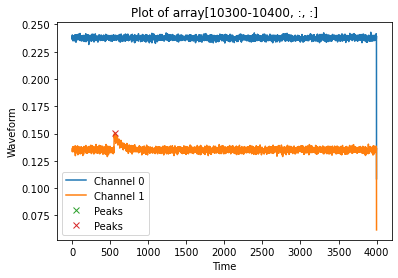

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [558]
Values of ch1 peaks: [0.15209961]
Index range of event numbers: 10400-10500


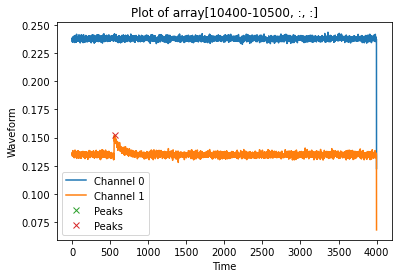

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [557]
Values of ch1 peaks: [0.15091553]
Index range of event numbers: 10600-10700


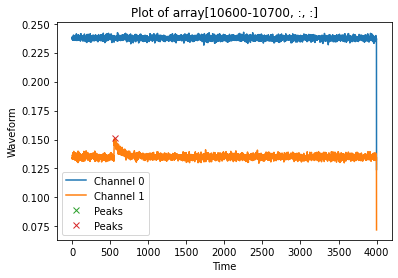

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [556]
Values of ch1 peaks: [0.15224609]
Index range of event numbers: 11000-11100


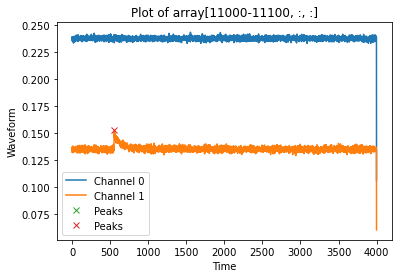

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [553]
Values of ch1 peaks: [0.15012207]
Index range of event numbers: 11100-11200


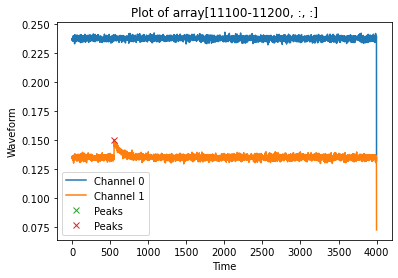

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [552]
Values of ch1 peaks: [0.15010986]
Index range of event numbers: 11200-11300


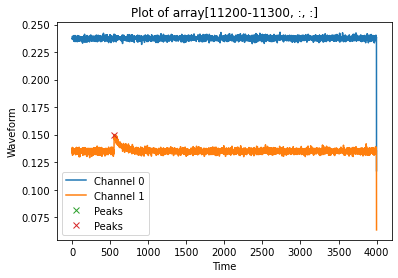

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [558]
Values of ch1 peaks: [0.15113525]
Index range of event numbers: 11600-11700


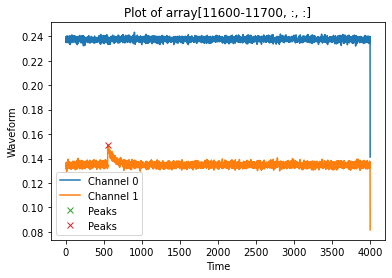

In [23]:
import matplotlib.pyplot as plt
avg_nEvents = 100

total_events = len(acq01_mean)
height_threshold_0 = 0.25
height_threshold_1 = .15
distance_between_peaks = 50

for start in range(0,total_events, avg_nEvents):
    end = start + avg_nEvents
    #print("start", start)
    #print("end", end)
   
    waveforms_subset_0 = acq01_data[start:end, 0, :]
    waveforms_subset_1 = acq01_data[start:end, 1, :]
    average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
    average_waveform_1 = -np.mean(waveforms_subset_1, axis=0)
    
    peaks0, properties = find_peaks(average_waveform_0, height=height_threshold_0, distance=distance_between_peaks)
    peaks1, properties = find_peaks(average_waveform_1, height=height_threshold_1, distance=distance_between_peaks) 
    

    #if average_waveform_1[peaks1] > height_threshold:
    #print(f'Indices of ch0 peaks: {peaks0}')
    #print(f'Values of ch0 peaks: {average_waveform_0[peaks0]}')
    #print(f'Indices of ch1 peaks: {peaks1}')
    #print(f'Values of ch1 peaks: {average_waveform_1[peaks1]}')
    #print(f'Indices of event number: {start}')   
    
    if (peaks0.size>0) | (peaks1.size>0):
        print(f'Waveform Indices of ch0 peaks: {peaks0}')
        print(f'Values of ch0 peaks: {average_waveform_0[peaks0]}')
        print(f'Waveform Indices of ch1 peaks: {peaks1}')
        print(f'Values of ch1 peaks: {average_waveform_1[peaks1]}')
        print(f'Index range of event numbers: {start}-{end}')
        plt.plot(average_waveform_0, label=f'Channel {0}')
        plt.plot(average_waveform_1, label=f'Channel {1}')
        plt.plot(peaks0, average_waveform_0[peaks0], "x", label='Peaks')
        plt.plot(peaks1, average_waveform_1[peaks1], "x", label='Peaks')
   

        plt.title(f'Plot of array[{start}-{end}, :, :]')
        plt.xlabel('Time')
        plt.ylabel('Waveform')
        plt.legend()
        plt.show()
    
    
    
    event_num = []
    #if average_waveform_1[peaks1] > height_threshold:
    #    event_num.append(start)

#print("event_num array", event_num)
        
     
    
    
    